# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Develop your first NN in Keras



# Import modules
<hr style="border:2px solid black"> </hr>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

# Import dataset
<hr style="border:2px solid black"> </hr>


- It des ribes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.
- The problem is a classification problem. The output is either 1 (has diabete) or 0 (does not have diabete).



In [3]:
# load pima indians dataset
dataset = numpy.loadtxt("../DATASETS/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

In [4]:
# No of data x No of features (inputs)
X.shape

(768, 8)

In [7]:
# No of data x No of outputs
print(Y.shape)
# Thi is equivalent to
Y.reshape(-1,1).shape

(768,)


(768, 1)

In [9]:
Y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 0., 0.

# Define the model
<hr style="border:2px solid black"> </hr>


- We''ll use a fully-connected network structure with three layers. This means one input layers, two hidden layers and one output.
- We will use the rectifier (relu) activation function on the first two layers and the sigmoid activation function in the output layer. We use a sigmoid activation function on the output layer to ensure our network output is between 0 and 1.



In [11]:
model = Sequential()
model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform' , activation=  "relu" ))
model.add(Dense(8, kernel_initializer = "uniform" , activation = "relu" ))
model.add(Dense(1, kernel_initializer = "uniform" , activation = "sigmoid" ))

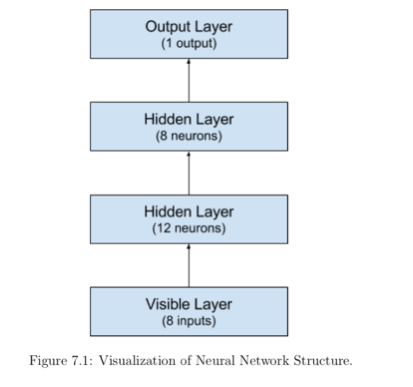


- Just to clarify the way we built the framework. **You may be wondering why we have used an activation function in the inupt layer?**
- `model.add(Dense(12, input_dim = 8, kernel_initializer = 'uniform' , activation = "relu" ))`
    - It defines the input layer (`input_dim`) as having `8` inputs.
    - It defines a hidden layer with 12 neurons, connected to the input layer that use relu activation function.
    - It initializes all weights using a sample of uniform random numbers.



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


# Compile the model
<hr style="border:2px solid black"> </hr>

In [ ]:
"""
Now that the model is defined, we can compile it. Compiling the model uses the effcient numerical 
libraries under the covers (the so-called backend) such as Theano or TensorFlow
"""

In [14]:
bce = tf.keras.losses.BinaryCrossentropy()
adam = tf.keras.optimizers.Adam()
model.compile(loss= bce , optimizer= adam , metrics = ['accuracy'])

# Fit model
<hr style="border:2px solid black"> </hr>

In [ ]:
"""
Now it is time to execute the model on some data. We can train or fit our model on our loaded data
by calling the fit() function on the model.
The training process will run for a fixed number of iterations through the dataset called epochs, 
that we must specify using the nb epoch argument. We can also set the number of instances that are 
evaluated before a weight update in the network is performed called the batch size and set using 
the batch size argument. For this problem we will run for a small number of epochs (150) and use
a relatively small batch size of 10.
"""

In [18]:
model.fit(X, Y, batch_size=10, epochs=150)

Epoch 1/150
77/77 [==============================] - 0s 878us/step - loss: 0.6650 - accuracy: 0.6510
Epoch 2/150
77/77 [==============================] - 0s 871us/step - loss: 0.6565 - accuracy: 0.6458
Epoch 3/150
77/77 [==============================] - 0s 890us/step - loss: 0.6495 - accuracy: 0.6523
Epoch 4/150
77/77 [==============================] - 0s 873us/step - loss: 0.6426 - accuracy: 0.6523
Epoch 5/150
77/77 [==============================] - 0s 805us/step - loss: 0.6396 - accuracy: 0.6667
Epoch 6/150
77/77 [==============================] - 0s 815us/step - loss: 0.6292 - accuracy: 0.6667
Epoch 7/150
77/77 [==============================] - 0s 817us/step - loss: 0.6198 - accuracy: 0.6771
Epoch 8/150
77/77 [==============================] - 0s 800us/step - loss: 0.6078 - accuracy: 0.6758
Epoch 9/150
77/77 [==============================] - 0s 817us/step - loss: 0.6057 - accuracy: 0.6875
Epoch 10/150
77/77 [==============================] - 0s 882us/step - loss: 0.5926 - accura

# Evaluate the mode
<hr style="border:2px solid black"> </hr>

In [ ]:
"""
We have trained our neural network on the entire dataset and we can evaluate the performance 
of the network on the same dataset. This will only give us an idea of how well we have modeled
the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new 
data. We have done this for simplicity, but ideally, you could separate your data into train 
and test datasets for the training and evaluation of your model.
"""

In [19]:
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

24/24 [==============================] - 0s 749us/step - loss: 0.4404 - accuracy: 0.7865
accuracy: 78.65%


# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

